# Get bounding boxes from Urban Atlas FUA and City polygons

In [1]:
%matplotlib inline

import numpy as np
from shapely.geometry import MultiLineString, MultiPolygon, Polygon, box, shape
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# read in the city and fua polygons
INPUT_FILE = "./../../../s3/data/d001_administration/urban_audit_city_2021/URAU_RG_100K_2021_4326_CITIES/URAU_RG_100K_2021_4326_CITIES.shp"
# INPUT_FILE = "./../../../s3/data/d001_administration/urban_audit_fua_2021/URAU_RG_100K_2021_4326_FUA/URAU_RG_100K_2021_4326_FUA.shp"
geo_json = gpd.read_file(INPUT_FILE)
gdf = gpd.GeoDataFrame(geo_json, crs="EPSG:4326")
# compute bounding boxes
gdf = pd.concat([gdf, gdf.bounds], axis=1)

## Data visualization

<AxesSubplot: >

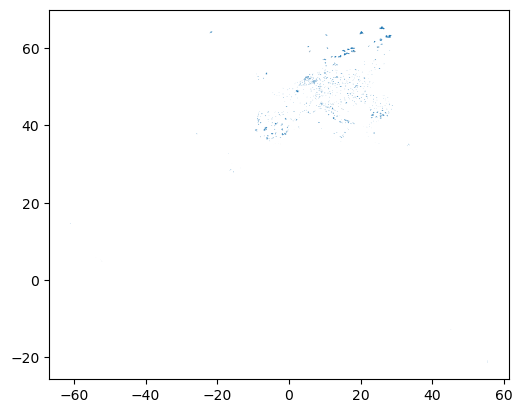

In [3]:
# plot all polygons
gdf.plot()

In [4]:
# display as table
gdf

,URAU_CODE,URAU_CATG,CNTR_CODE,URAU_NAME,CITY_CPTL,FUA_CODE,AREA_SQM,NUTS3_2021,FID,geometry,minx,miny,maxx,maxy
0,CH011C,C,CH,Thun,None,CH001F,4.186472e+07,CH021,CH011C,"POLYGON ((7.63850 46.74680, 7.63800 46.74630, ...",7.5822,46.7090,7.6902,46.8100
1,CH012C,C,CH,Zug,None,CH012F,5.218621e+07,CH066,CH012C,"MULTIPOLYGON (((8.54340 47.22210, 8.54590 47.2...",8.4693,47.0811,8.5777,47.2232
2,BE003C,C,BE,Gent,None,BE003F,1.579849e+08,BE234,BE003C,"POLYGON ((3.80020 51.18720, 3.80120 51.18650, ...",3.5798,50.9795,3.8493,51.1881
3,BE004C,C,BE,Charleroi,None,BE004F,1.301384e+08,BE32B,BE004C,"POLYGON ((4.45850 50.48120, 4.47770 50.47700, ...",4.3478,50.3529,4.5629,50.4924
4,BG018C,C,BG,Vratsa,None,BG018F,7.060748e+08,BG313,BG018C,"POLYGON ((23.48640 43.13540, 23.48360 43.13970...",23.3892,43.1099,23.8911,43.4908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,RO028C,C,RO,Piteşti,None,RO028F,4.096882e+07,RO311,RO028C,"POLYGON ((24.85490 44.89050, 24.85500 44.89040...",24.7804,44.8175,24.9427,44.8958
725,SK001C,C,SK,Bratislava,Y,SK001F,3.676095e+08,SK010,SK001C,"POLYGON ((17.24180 48.02250, 17.24050 48.02170...",16.9461,48.0067,17.2845,48.2651
726,RO010C,C,RO,Târgu Mureş,None,RO010F,4.923764e+07,RO125,RO010C,"POLYGON ((24.62680 46.56270, 24.62530 46.56200...",24.4918,46.5000,24.6268,46.5962
727,SK002C,C,SK,Košice,None,SK002F,2.370609e+08,SK042,SK002C,"MULTIPOLYGON (((21.15300 48.82440, 21.15340 48...",21.1199,48.5700,21.3582,48.8245


(50.929500000000004, 51.238099999999996)

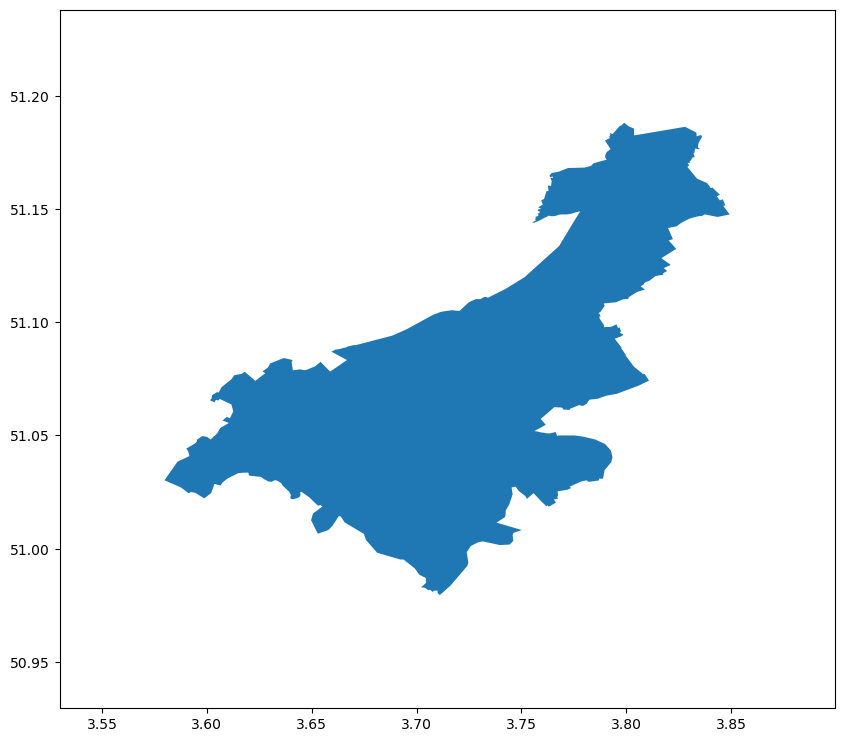

In [8]:
# plot one poligon by name
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax)

xmin, ymin, xmax, ymax = gdf[gdf.URAU_NAME == 'Gent'].total_bounds
# xmin, ymin, xmax, ymax = gdf[gdf.URAU_NAME == 'Taranto'].total_bounds
pad = 0.05  # add a padding around the geometry
ax.set_xlim(xmin-pad, xmax+pad)
ax.set_ylim(ymin-pad, ymax+pad)

## Save csv with city code and bounding boxes

In [6]:
gdf_bb = gdf[["URAU_CODE","URAU_NAME","minx","miny","maxx","maxy"]]
gdf_bb.to_csv("./../../../s3/data/bboxes/URAU_city_bboxes_4326.csv", index=False)